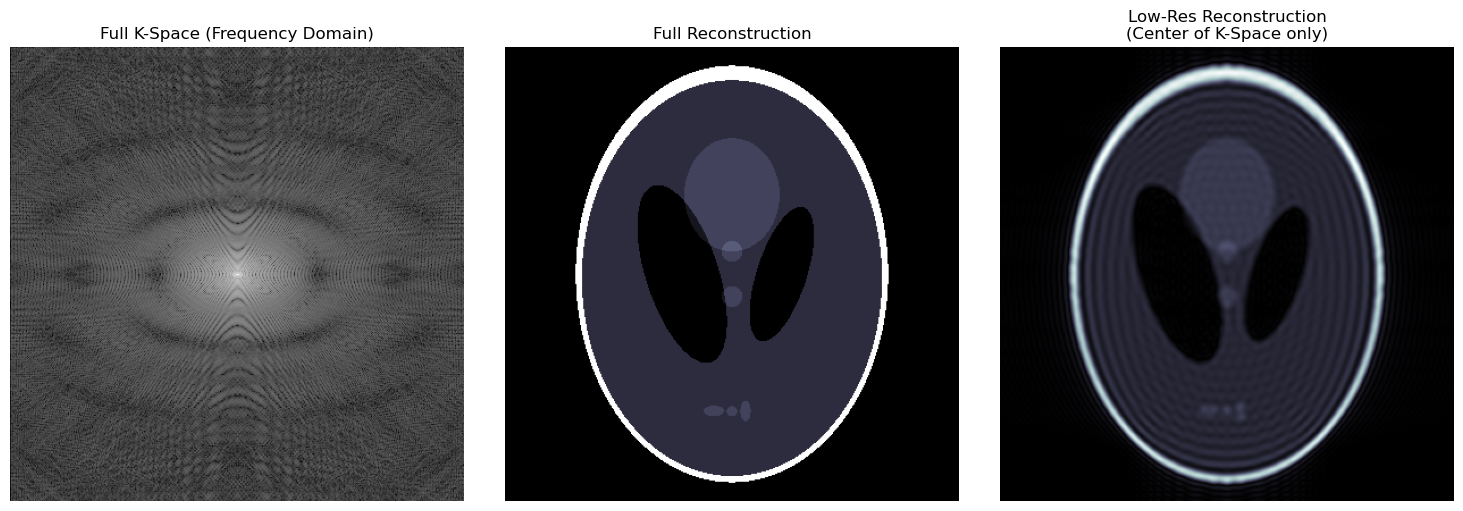

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift
from skimage.data import shepp_logan_phantom

# 1. Generate the "Object" (The patient inside the magnet)
patient = shepp_logan_phantom()

# 2. Simulate the MRI Acquisition: Convert Image to K-Space
# We use the 2D Fast Fourier Transform (FFT)
k_space = fftshift(fft2(patient))

# 3. Simulate a "Fast" Scan (Low-Res)
# In MRI, high frequencies (edges/details) are at the outer edges of K-Space.
# We will 'zero out' the edges to simulate a scan that only captured the center.
rows, cols = k_space.shape
center_row, center_col = rows // 2, cols // 2
mask_size = 40  # Only keep a 40x40 square in the center
mask = np.zeros((rows, cols))
mask[center_row-mask_size:center_row+mask_size, center_col-mask_size:center_col+mask_size] = 1

low_res_k_space = k_space * mask

# 4. Reconstruction: Inverse FFT
reconstructed_full = np.abs(ifft2(k_space))
reconstructed_low_res = np.abs(ifft2(low_res_k_space))

# 5. Visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(np.log(np.abs(k_space) + 1), cmap='gray')
plt.title("Full K-Space (Frequency Domain)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(reconstructed_full, cmap='bone')
plt.title("Full Reconstruction")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(reconstructed_low_res, cmap='bone')
plt.title("Low-Res Reconstruction\n(Center of K-Space only)")
plt.axis('off')

plt.tight_layout()
plt.show()